In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**MEMBUAT DATASET**

---
Sebelumnya dataset masih dalam dataset_sampah maka akan dipecaha menjadi beberapa bagian yaitu:


1.   train
2.   test
3.   validation

In [2]:
import os
import zipfile as zf
import random
import shutil
import PIL
import tensorflow as tf
from pathlib import Path
from fastai.vision import *

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
# unzipping dataset
files = zf.ZipFile("/content/drive/My Drive/Colab Notebooks/dataset_sampah.zip",'r')
files.extractall()
files.close()

In [4]:
import pandas as pd
import shutil
from tqdm.notebook import tqdm as tq

In [5]:
labels =os.listdir(os.path.join(os.getcwd(),"dataset_sampah"))
labels

['kaca-piring',
 'botol-plastik',
 'organik',
 'kertas',
 'plastik',
 'botol-kaca',
 'metal',
 'kardus']

In [6]:
data_dir=os.path.join('dataset_sampah/')

In [7]:
#hitung total gambar
# kardus 
for x in labels:
  x = os.path.join(data_dir + x)
  print('total ',x,' images:', len(os.listdir(x)))





total  dataset_sampah/kaca-piring  images: 367
total  dataset_sampah/botol-plastik  images: 744
total  dataset_sampah/organik  images: 2798
total  dataset_sampah/kertas  images: 845
total  dataset_sampah/plastik  images: 290
total  dataset_sampah/botol-kaca  images: 658
total  dataset_sampah/metal  images: 690
total  dataset_sampah/kardus  images: 712


In [8]:
mypath=os.path.join('dataset_sampah/')

In [10]:
#mengumpulkan nama, lokasi
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)



In [11]:
# memasukan variabel yang sudah dikumpulkan pada looping di atas menjadi sebuah dataframe agar rapih
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
botol-kaca        658
botol-plastik     744
kaca-piring       367
kardus            712
kertas            845
metal             690
organik          2798
plastik           290
dtype: int64

In [12]:
#load library untuk train test split
from sklearn.model_selection import train_test_split


In [13]:
#variabel yang digunakan pada pemisahan data ini
X= df['path']
y= df['tag']


In [14]:
# split dataset awal menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=300)

In [15]:
# kemudian data test dibagi menjadi 2 test dan validation.
X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=100)

In [16]:
# menyatukan kedalam masing-masing dataframe

df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_te = pd.DataFrame({'path':X_test
              ,'tag':y_test
             ,'set':'test'})

df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation'})

In [17]:
print('train size', len(df_tr))
print('val size', len(df_te))
print('test size', len(df_val))

train size 5683
val size 710
test size 711


In [18]:
# melihat proporsi pada masing masing set a
df_all = df_tr.append([df_te,df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek sample datanya
df_all.sample(3)


set         tag          
test        botol-kaca         71
            botol-plastik      92
            kaca-piring        26
            kardus             68
            kertas             87
            metal              68
            organik           276
            plastik            22
train       botol-kaca        518
            botol-plastik     576
            kaca-piring       309
            kardus            589
            kertas            669
            metal             546
            organik          2245
            plastik           231
validation  botol-kaca         69
            botol-plastik      76
            kaca-piring        32
            kardus             55
            kertas             89
            metal              76
            organik           277
            plastik            37
dtype: int64 




,path,tag,set
3849,dataset_sampah/kaca-piring/00000633.jpg,kaca-piring,train
5673,dataset_sampah/botol-kaca/00000606.jpg,botol-kaca,train
5004,dataset_sampah/kertas/R_6290.jpg,kertas,train


In [19]:
datasource_path = "dataset-sampah/"
dataset_path = "dataset/"

In [20]:
for index, row in tq(df_all.iterrows()):
    
    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

**Data preprocessing**


---
data dibersihkan dengan membaut augmentasi agar data lebih bervariasi


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 20,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        horizontal_flip = True,
        vertical_flip = True,
        fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(
        rescale = 1./255
)
test_datagen = ImageDataGenerator(
        rescale = 1./255
)

yang ini jangan dirun

In [ ]:
# Parameter input untuk network
#dim = (224, 224)
#channel = (3,)
#input_shape = dim + channel
# Batch size
#batch_size = 16
# Epoch
#epoch = 10

In [22]:
#pembagina pertama
img_shape = (224, 224, 3) # default values

train_batch_size = 256
val_batch_size = 32

train_generator = train_datagen.flow_from_directory(
            'dataset/train',
            target_size = (img_shape[0], img_shape[1]),
            batch_size = train_batch_size,
            class_mode = 'categorical',)
validation_generator = validation_datagen.flow_from_directory(
            'dataset/validation',
            target_size = (img_shape[0], img_shape[1]),
            batch_size = val_batch_size,
            class_mode = 'categorical',
            shuffle=False)

test_generator = test_datagen.flow_from_directory(
            'dataset/test',
            target_size = (img_shape[0], img_shape[1]),
            batch_size = val_batch_size,
            class_mode = 'categorical',
            shuffle=False,)

num_class = test_generator.num_classes


Found 5683 images belonging to 8 classes.
Found 711 images belonging to 8 classes.
Found 710 images belonging to 8 classes.


fungsi ini menambah tingkat kebersihan data dan juga keakurasian namun dalam codingan dibawah belum ditambahkan maka silahkan mencobanya dan membandingkannya

In [ ]:
def tf_data_generator(generator, input_shape):
    num_class = generator.num_classes
    tf_generator = tf.data.Dataset.from_generator(
        lambda: generator,
        output_types=(tf.float32, tf.float32),
        output_shapes=([None
                        , input_shape[0]
                        , input_shape[1]
                        , input_shape[2]]
                       ,[None, num_class])
    )
    return tf_generator
train_data = tf_data_generator(train_generator, img_shape)
test_data = tf_data_generator(test_generator, img_shape)
val_data = tf_data_generator(validation_generator, img_shape)

**Membuat model VGG16**





disini membuat model vgg16 namun jika ingin  membuat model yang baru seperti mobilenetv2 sudah saya rekomendasikan dengan contoh di bawah ini


link:https://hljames.github.io/dog-breed-classification/cnn_scratch_mobile.html

In [23]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
import tensorflow as tf

from tensorflow.keras.regularizers import l1, l2, L1L2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Model VGG16 bisa juga VGG19 bisa dipilih yang mana yang paling tepat

In [24]:
vgg = VGG16(weights = 'imagenet',
              include_top = False,
              input_shape = img_shape)

58900480/58889256 [==============================] - 0s 0us/step


In [25]:
for layer in vgg.layers[:-3]:
  layer.trainable = False

In [26]:
# Create the model
model = Sequential()
 
# Add the vgg convolutional base model
model.add(vgg)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(8, activation='softmax'))



In [27]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 8)                 8200      
                                                                 
Total params: 40,414,024
Trainable params: 30,418,952
Non-trainable params: 9,995,072
_________________________________________________________________


**Training Data**

disini melakukan training modelnya 

perlu diingat untuk jumlah epoch bisa ditambah untuk papernya sendiri 30 epoch



In [29]:
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
#mc = ModelCheckpoint('VGG16 Garbage Classifier.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
EPOCH=15
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size ,
   
    validation_data=validation_generator,
    validation_steps=validation_generator.samples/validation_generator.batch_size,
     epochs=EPOCH,
    verbose=1
    )

Epoch 1/15
22/22 [==============================] - 187s 5s/step - loss: 1.8253 - accuracy: 0.4971 - val_loss: 0.8697 - val_accuracy: 0.6934
Epoch 2/15
22/22 [==============================] - 96s 4s/step - loss: 0.8752 - accuracy: 0.7081 - val_loss: 0.6690 - val_accuracy: 0.7679
Epoch 3/15
22/22 [==============================] - 97s 4s/step - loss: 0.7304 - accuracy: 0.7507 - val_loss: 0.6650 - val_accuracy: 0.7679
Epoch 4/15
22/22 [==============================] - 97s 4s/step - loss: 0.6267 - accuracy: 0.7903 - val_loss: 0.6580 - val_accuracy: 0.7932
Epoch 5/15
22/22 [==============================] - 96s 4s/step - loss: 0.5735 - accuracy: 0.8075 - val_loss: 0.4631 - val_accuracy: 0.8340
Epoch 6/15
22/22 [==============================] - 96s 4s/step - loss: 0.5055 - accuracy: 0.8337 - val_loss: 0.4332 - val_accuracy: 0.8425
Epoch 7/15
22/22 [==============================] - 96s 4s/step - loss: 0.4694 - accuracy: 0.8386 - val_loss: 0.4122 - val_accuracy: 0.8650
Epoch 8/15
22/22 [=

**Accuracy, ROC Curve, and AUC**

Disini untuk melakukan analisis data yang di buat apakah model yang dibuat belajar atau tidak  melakukan evaluasi dan mencoba model yang terbaik
dan untuk mengecek apakah terjadi overvitting atau undervitting

Training history

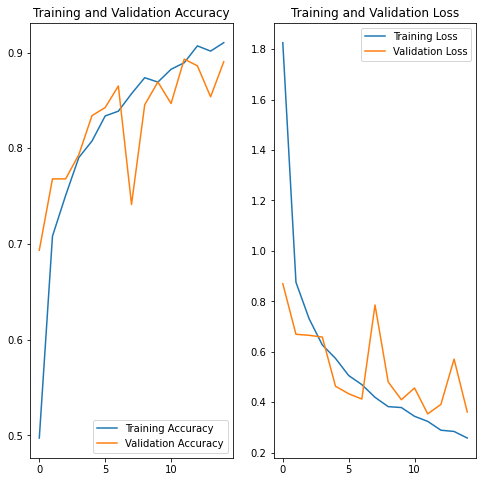

In [30]:
  #Visualisasi akurasi dan loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCH)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

model yang dibuat sudah lumayan cukup baik

Evaluasi accuracy model:

In [31]:
model.evaluate(validation_generator)

23/23 [==============================] - 7s 283ms/step - loss: 0.3608 - accuracy: 0.8903


[0.3608019948005676, 0.8902953863143921]

In [33]:
loss, acc = model.evaluate(test_generator,steps=len(test_generator),verbose=0)
print('Accuracy on training data: {:.4f} \nLoss on training data: {:.4f}'.format(acc,loss),'\n')
 
loss, acc = model.evaluate(test_generator,steps=len(test_generator),verbose=0)
print('Accuracy on test data: {:.4f} \nLoss on test data: {:.4f}'.format(acc,loss))

Accuracy on training data: 0.8859 
Loss on training data: 0.3522 

Accuracy on test data: 0.8859 
Loss on test data: 0.3522


Kalkulasi ROC curve dan lakukan plotting.

In [34]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

23/23 [==============================] - 6s 255ms/step


In [35]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score


In [62]:
fpr = {}
tpr = {}
thresh ={}
n_class = 8

for i in range(n_class):    
    fpr[i], tpr[i], _= roc_curve(validation_generator.classes, preds[:,i], pos_label=i)

In [38]:
roc_auc_score(validation_generator.classes, preds, multi_class='ovo')

0.9819823357513255

untuk tingkatan roc auc sudah bagus

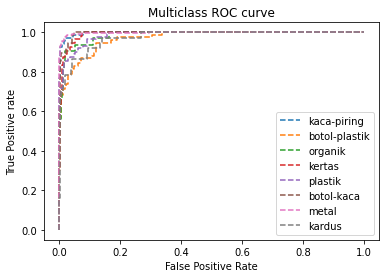

In [49]:
for index, item in enumerate(labels):
  plt.plot(fpr[index], tpr[index], linestyle='--', label=item)
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

untuk model evaluasi menunjukan untuk true positive sudah tinggi dan juga bagus

untuk pemahamannya bisa klik url:https://ichi.pro/id/memahami-kurva-auc-roc-226256005608842

In [50]:
pred_Y = model.predict(validation_generator, batch_size = 32, verbose = True)
pred_Y_cat = np.argmax(pred_Y, -1)

23/23 [==============================] - 6s 257ms/step


Save model

In [51]:
model.save('junk91.h5')

**Prediction on test set**

mencoba atau test model yang sudah dilatih dan disimpan

In [52]:
from tensorflow.keras.models import load_model
model = load_model('junk91.h5')

contoh kodingan bisa dipilih

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " ")
  else:
    print(fn + " ")
 

versioan asli

In [54]:
from sklearn.preprocessing import LabelBinarizer
LABELS=["KACA PIRING","BOTOL PLASTIK","ORGANIK","KERTAS","PLASTIK","BOTOL KACA","METAL","KARDUS"]
# binarize the labels
labels = np.array(LABELS)
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [55]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import mimetypes
import argparse
import imutils
import pickle
import cv2
import os

In [56]:
def predict(imagePath):
    # load the input image (in Keras format) from disk and preprocess
    # it, scaling the pixel intensities to the range [0, 1]
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    output = image.copy()
    image = cv2.resize(image, (224, 224))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    # make bounding box predictions on the input image
    proba = model.predict(image)[0]
    idx = np.argmax(proba)
    label = lb.classes_[idx]
    label = "{}: {:.2f}% ".format(label, proba[idx] * 100)
    cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
        0.7, (255, 0, 0), 2)
        
    # show the output image
    fig=plt.figure(figsize=(10,10))
    plt.grid(b=None)
    plt.axis('off')
    return plt.imshow(output)

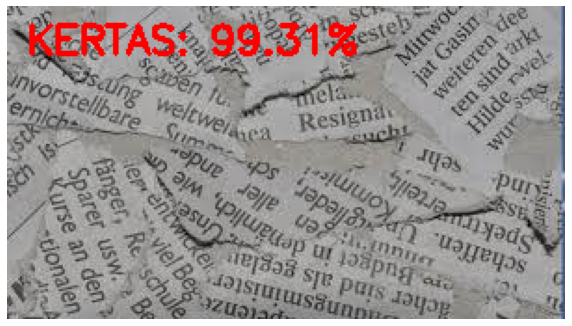

In [57]:
imagePath = "/content/dataset/test/kertas/R_2872.jpg"
predict(imagePath)

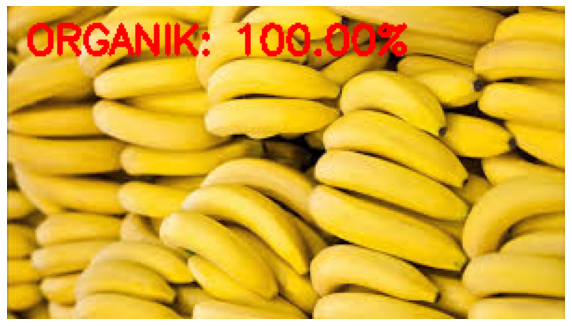

In [ ]:
imagePath = "/content/dataset/test/organik/O_10574.jpg"
predict(imagePath)

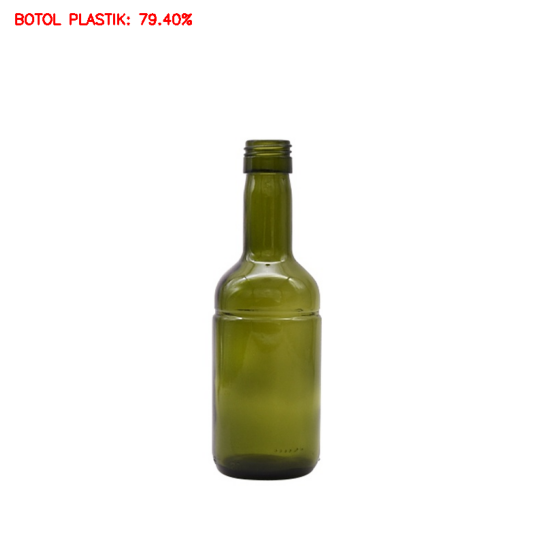

In [ ]:
imagePath = "/content/dataset/test/botol-kaca/00000207.jpg"
predict(imagePath)

**CLEAN UP CODE**

UNTUK MEMEBERSIHKAN MEMORY DAN RESTAR KERNEL

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)